In [ ]:
import pandas as pd
import numpy as np

In [ ]:
estados = pd.read_csv('./brasil_estados.csv')
estados

In [ ]:
estados.groupby('regiao_nome')['area'].mean().reset_index()

In [ ]:
area_proporcional = estados[['regiao_nome', 'uf', 'area']].merge(
    estados.groupby('regiao_nome')['area'].sum().reset_index(), on = 'regiao_nome', how = 'left'
)
area_proporcional

In [ ]:
area_rank = estados.groupby(['uf'])['area'].sum().rank().reset_index().sort_values(by='area', ascending=False)
area_rank

In [ ]:
area_rank = estados.groupby(['regiao_nome', 'uf'])['area'].sum().reset_index()
area_rank['rank_area_regiao'] = area_rank.groupby('regiao_nome')['area'].rank(method='first')
area_rank

In [ ]:
media = estados['area'].mean()
estados['classe_area'] = estados['area'].apply(
    lambda x : 'Acima' if x > media else 'Abaixo'
)
estados

In [ ]:
estados.pivot_table(
    index = 'regiao_nome',
    columns = 'classe_area',
    values = 'area', 
    aggfunc = ['sum', 'mean', 'count'],
    fill_value = 0
).reset_index()

In [ ]:
soma = estados['area'].sum()
maiores_estados = estados[['uf', 'area']].sort_values(by='area', ascending=False)
maiores_estados['percentual'] = round(maiores_estados['area'] / soma * 100, 2)
maiores_estados['acumulado'] = maiores_estados['percentual'].cumsum()
maiores_estados['curva_abc'] = maiores_estados['acumulado'].apply(
    lambda x : 'A' if x <= 65 else ('B' if x <= 90 else 'C')
)
maiores_estados['legenda'] = maiores_estados.apply(
    lambda x : x['uf'] if x['curva_abc'] != 'C' else 'Outros', axis = 1
)
maiores_estados

In [ ]:
maiores_areas = estados[['uf', 'area']].sort_values(by='area', ascending=False)
maiores_areas['anterior'] = maiores_areas['area'].shift(1)
maiores_areas['diferenca'] = maiores_areas['area'].shift(1) - maiores_areas['area']
maiores_areas['percentual'] = maiores_areas['area'].pct_change(periods=1)
maiores_areas

In [43]:
estados[[
 'area',
 'populacao',
 'matricula',
 'idh',
 'receitas',
 'despesas',
 'rendimento', 
 'veiculos'
]].corr()

,area,populacao,matricula,idh,receitas,despesas,rendimento,veiculos
area,1.000000,0.045726,0.103052,-0.210447,0.009131,0.012493,-0.242461,-0.022114
populacao,0.045726,1.000000,0.994712,0.368471,0.983539,0.981515,0.365265,0.967715
matricula,0.103052,0.994712,1.000000,0.304599,0.963954,0.962989,0.307704,0.944988
idh,-0.210447,0.368471,0.304599,1.000000,0.478499,0.454881,0.947880,0.483255
receitas,0.009131,0.983539,0.963954,0.478499,1.000000,0.997481,0.468843,0.991868
despesas,0.012493,0.981515,0.962989,0.454881,0.997481,1.000000,0.448210,0.991337
rendimento,-0.242461,0.365265,0.307704,0.947880,0.468843,0.448210,1.000000,0.460790
veiculos,-0.022114,0.967715,0.944988,0.483255,0.991868,0.991337,0.460790,1.000000


<Axes: xlabel='matricula', ylabel='populacao'>

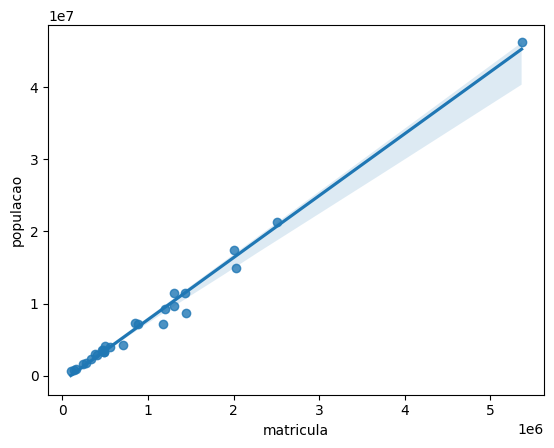

In [45]:
import seaborn as sns
sns.regplot(data = estados, x = 'matricula', y = 'populacao')